# [E-7] 나랑 닮은 연예인은 누구?

## 루브릭

평가문항

1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.
	닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.

    * 닮은 꼴 순위가 아주 만족스럽다ㅋㅋㅋㅋ 아주 정확한거 같다^^


2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.
	다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.
    
    * 1위부터 5위까지 임베딩 거리 0.3.8-4.5 내로 닯은 연예인을 찾았다.
    

3. 다양하고 재미있는 결과 시각화를 시도하였다.
	matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.


    * 프로젝트 1번처럼 사진으로 시각화 하고 싶었지만 어떻게 적용해야할지 잘 모르겠다. 아직 응용하는건 잘 안된다.
    * scatter, t-sne로 적용해보고 싶었는데 구글링으로 방법을 봐도 이걸 내 코드에 어떻게 적용해야하는지 헷갈린다. 나중에 우수 프로젝트 보고 방법을 배우려고 한다.

## 목차
1. 이미지 불러오기 
2. 얼굴 찾기(detection: dlib)
3. 얼굴만 남기기 (crop)
4. 얼굴 임베딩 추출하기(face recognition face encoding)
5. 임베딩 공간 속 거리 구하기(연예인과 비교하기)
6. 시각화

# Step1. 사진 모으기

### 내 사진 불러오기

[(241, 526, 562, 205)]


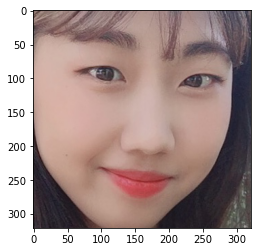

In [4]:

import face_recognition
import os
import matplotlib.pyplot as plt

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file) #이미지를 불러온 후 얼굴 찾기 
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0] #이미지에서 얼굴영역 좌표
    cropped_face = image[a:c,d:b,:] #얼굴부분만 자른다.
    
    print(face_locations)
    return cropped_face

image_path = os.getenv('HOME')+'/aiffel/face_embedding/my_image/my_img2.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

In [5]:
# 내 사진들 얼굴 임베딩 벡터 거리 구하기
# 이미지 파일 확인하기 

my_dir_path = os.getenv('HOME')+'/aiffel/face_embedding/my_image'
my_file_list = os.listdir(my_dir_path)

print ("file_list: {}".format(my_file_list))

file_list: ['my_img1.jpg', 'my_img3.jpg', 'my_img2.jpg']


In [6]:
# 특정 얼굴 영역에서 얼굴 임베딩 벡터 구하는 참수 
my_image_file = os.path.join(my_dir_path, 'my_img2.jpg')
my_face= get_gropped_face(my_image_file)

def my_face_embedding(face):
    return face_recognition.face_encodings(face)

my_embedding = my_face_embedding(my_face)  
my_embedding

[(241, 526, 562, 205)]


[array([-0.05814962,  0.03276615,  0.02765759, -0.12846261, -0.15263888,
        -0.00475288, -0.08323399, -0.08532543,  0.14508207, -0.16074599,
         0.16140854, -0.08345225, -0.21028396, -0.02012151, -0.07998221,
         0.18990119, -0.12988487, -0.16893335, -0.0372459 ,  0.02994346,
         0.05632373,  0.05850054, -0.02041175,  0.04996515, -0.1610783 ,
        -0.33138707, -0.09950261, -0.02883518, -0.06723017, -0.07897256,
        -0.04190881,  0.1082686 , -0.18269648,  0.03190478,  0.01561179,
         0.07831962, -0.01054732, -0.09277208,  0.12780555,  0.02547964,
        -0.29030219,  0.04915668, -0.01000607,  0.22135331,  0.15035976,
        -0.00102527,  0.04763181, -0.15863143,  0.10236093, -0.19046445,
         0.00345092,  0.15987033,  0.01344654,  0.01631563, -0.01122889,
        -0.12498359,  0.02570473,  0.09233578, -0.0912068 , -0.00544772,
         0.06903856, -0.04683944,  0.00508657, -0.15127593,  0.20133731,
         0.03480142, -0.13922523, -0.16934972,  0.1

In [7]:
# 모든 내 사진의 얼굴영역의 임베딩 벡터를 구하기

def my_face_embedding_dict(dir_path): 
    file_list = os.listdir(dir_path)
    embedding_dict = {} #여기에 임베딩한 사진을 넣는다.

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        if len(face) == 0: continue 
        embedding = my_face_embedding(face)
        if len(embedding) > 0:  # 얼굴을 잘 못찾으면 len(embedding)==0이 될 수 있다.
                     
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [8]:
my_embedding_dict = my_face_embedding_dict(my_dir_path)
# embedding_dict['my_img2']

[(118, 315, 341, 92)]
[(77, 613, 263, 428)]
[(241, 526, 562, 205)]


In [9]:
# 임베딩 벡터 간의 거리 구하기 (np.linalg.norm 사용)
import numpy as np

def my_face_distance(name1,name2):
    return np.linalg.norm(my_embedding_dict[name1]-my_embedding_dict[name2],ord=2)
    # L2 norm distance로 거리 계산(ord=2)
my_face_distance('my_img1','my_img2')

0.2743737348766689

In [10]:
def my_face_distance(name1,name2):
    return np.linalg.norm(my_embedding_dict[name1]-my_embedding_dict[name2],ord=2)

my_face_distance('my_img1','my_img3')

0.3108720535727121

In [11]:
def my_face_distance(name1,name2):
    return np.linalg.norm(my_embedding_dict[name1]-my_embedding_dict[name2],ord=2)

my_face_distance('my_img2','my_img3')

0.28558612996348637

* 내 사진 총 3장의 임베딩 사이 거리 = 
img 1-2 : 0.27 , 
img 1-3 : 0.31 , 
img 2-3 : 0.28 

= 모두 거리가 짧으므로 닯았다고 판단할 수 있음

# Step2. 얼굴 영역 자르기

### 비교할 연예인 사진 

In [12]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['이동국.jpeg', '한석규.jpg', '옥냥이.jpeg', '문별.jpg', '리암 니슨.png', '채연.jpg', '박완규.png', '주호민.jpeg', '손예진.jpeg', '정민철.jpg', '제이콥 배털론.jpg', '유희열.jpeg', '성룡.jpg', '트와이스쯔위.jpg', '고창석.jpeg', '김경진.png', '이범수.jpeg', '트와이스다현.jpeg', '이진호.jpeg', '차승원.jpg', '김C.jpeg', '박나래.jpeg', '앤드류 응.png', '장성호.jpeg', '사쿠라.jpg', '저스틴 존슨.jpeg', '박명수.jpg', '김희철.jpg', '슬리피.jpg', '크리스 햄스워스.jpg', '레드벨벳웬디.jpg', '정국.jpg', '씨잼.jpg', '하현우.jpg', '트와이스정연.jpg', '꽈두룹.jpeg', '효정.jpg', '시우민.jpg', '아이즈원조유리.jpeg', '드웨인 존슨.jpg', '하승진.jpg', '윤종신.jpeg', '송중기.jpeg', '박보영.jpg', '케빈 스페이시.jpeg', '잭 니콜슨.jpeg', '택연.jpg', '트와이스미나.jpg', '최준석.jpg', '톰 홀랜드.jpg', '승희.jpeg', '유해진.jpg', '디오.jpeg', '서장훈.jpg', '서현진.jpg', '김유정.jpg', '온앤오프라운.jpg', '박찬호.jpg', '러블리즈예인.jpg', '이진욱.jpeg', '이준혁.jpeg', '화사.jpg', '브래들리 쿠퍼.jpg', '장동건.jpeg', '수호.jpg', '케이.jpg', '지디.jpg', '백윤식.png', '최민식.jpg', '레인보우재경.jpg', '이재용.jpg', '잭 갤리퍼내키스.jpg', '이용진.jpg', '곽도원.jpg', '아이린.jpeg', '로저 무어.jpeg', 'obama.jpg', '신동엽.jpg', '뷔.png', '아놀드 슈워제네거.jpg', '철면수심.jpg', '레오나르도 디카프리오

[(68, 211, 175, 103)]


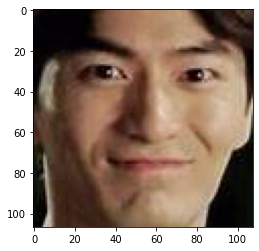

In [13]:
# 여러명의 연예인 사진을 얼굴영역만 잘라주는 함수
from PIL import Image

def celebrity_img(image_file):
    image = face_recognition.load_image_file(image_file) #이미지를 불러온 후 얼굴 찾기 
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0] #이미지에서 얼굴영역 좌표
    cropped_face = image[a:c,d:b,:] #얼굴부분만 자른다.
    len(face_locations) == 0 
    
    print(face_locations)
    return cropped_face

image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/이진욱.jpeg'

cropped_face = celebrity_img(image_path)
plt.imshow(cropped_face)

# Step3. 얼굴 영역의 임베딩 추출하기

In [14]:
def celebrity_face_embedding(face):
    return face_recognition.face_encodings(face)

In [15]:
# 모든 연예인 얼굴 임베딩 벡터 구하는 함수

def celebrity_face_embedding_dict(dir_path): 
    file_list = os.listdir(dir_path)
    embedding_dict = {} #여기에 임베딩한 사진을 넣는다.

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = celebrity_img(img_path)
        if len(face) == 0:continue #얼굴인식 실패시 embedding dict에 추가하지 않음  
        embedding = celebrity_face_embedding(face)
        if len(embedding) > 0:  # 얼굴을 잘 못찾으면 len(embedding)==0이 될 수 있다.
            
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [16]:
embedding_dict = celebrity_face_embedding_dict(dir_path)
# embedding_dict['크리스탈']

[(66, 145, 156, 56)]
[(142, 409, 409, 141)]
[(357, 788, 911, 233)]
[(162, 675, 547, 290)]
[(118, 428, 304, 242)]
[(175, 282, 283, 175)]
[(53, 239, 182, 110)]
[(56, 165, 146, 76)]
[(36, 126, 126, 36)]
[(139, 345, 325, 159)]
[(36, 195, 126, 106)]
[(80, 187, 155, 113)]
[(142, 414, 365, 191)]
[(160, 407, 345, 221)]
[(47, 179, 121, 104)]
[(53, 253, 182, 124)]
[(32, 170, 94, 107)]
[(133, 322, 288, 167)]
[(116, 373, 270, 218)]
[(231, 379, 498, 111)]
[(96, 253, 225, 124)]
[(26, 129, 78, 78)]
[(80, 366, 187, 259)]
[(50, 109, 86, 73)]
[(116, 253, 270, 98)]
[(68, 163, 175, 55)]
[(167, 291, 390, 68)]
[(82, 325, 211, 196)]
[(171, 409, 439, 141)]
[(418, 849, 973, 295)]
[(116, 322, 270, 167)]
[(201, 527, 468, 260)]
[(502, 2277, 1168, 1611)]
[(81, 390, 236, 236)]
[(348, 776, 669, 455)]
[(118, 414, 341, 191)]
[(196, 633, 285, 544), (126, 394, 216, 305)]
[(98, 407, 284, 221)]
[(44, 118, 95, 66)]
[(46, 305, 136, 215)]
[(98, 373, 253, 218)]
[(56, 145, 146, 56)]
[(56, 165, 146, 76)]
[(86, 235, 176, 145)]
[

# Step4. 모은 연예인들과 비교하기

임베딩 공간 속 벡터는 128차원이다. L2로 이미지간 거리를 구한다. 거리가 가까울 수록 닮은 것! 
이 수치를 시각화해서 보면 좋겠지만 128 차원은 너무 미세한 정보라 시각화가 어려워서 차원을 축소해서 시각화한다.
이때 pca, t-sne를 사용한다. 

In [19]:
#임베딩 벡터간에 거리 구하기
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [20]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('my_img1') #name 1 지정 내 사진을 이곳에 넣어놔야한다.
sort_key_func('길') #name2 

0.6799202914493105

In [21]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0])) # 여기서 모든 이미지랑 내 이미지 거리 비교함!
#dict item 을 넣어서 sorted function이랑 비교

[('my_img1',
  array([-0.05080657,  0.03531642,  0.0337279 , -0.13230163, -0.13889626,
          0.01527969, -0.06215252, -0.10153124,  0.14655043, -0.2147395 ,
          0.18612298, -0.10770639, -0.24502663, -0.03139133, -0.12159364,
          0.18121454, -0.12304944, -0.14824343, -0.05494214,  0.00727832,
          0.09216303,  0.0472937 , -0.06556469,  0.04897358, -0.12726004,
         -0.35382664, -0.09590873, -0.01615171, -0.06874543, -0.09255781,
         -0.06563743,  0.09293253, -0.15425162,  0.03030427, -0.03234698,
          0.07884046, -0.04079258, -0.08910987,  0.09239551,  0.05616074,
         -0.28965786,  0.01436936, -0.00102167,  0.22086675,  0.14401153,
         -0.00253725,  0.04323528, -0.16444041,  0.10438515, -0.19439584,
         -0.02284057,  0.1596759 ,  0.01977088,  0.05105052, -0.01332238,
         -0.10702968, -0.00560702,  0.12988345, -0.06722892,  0.03149948,
          0.07362016, -0.13038157, -0.02072477, -0.13008644,  0.20868526,
          0.07051256, -0.

In [33]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [34]:
#나와 가장 닯은 연예인은?
get_nearest_face('my_img1',top=10)

plt.show('my_img1')

순위 1 : 이름(아이유), 거리(0.38383125373551835)
순위 2 : 이름(강미나), 거리(0.40811619093434703)
순위 3 : 이름(나인뮤지스경리), 거리(0.4363056852231604)
순위 4 : 이름(트와이스모모), 거리(0.4508562100992452)
순위 5 : 이름(공효진), 거리(0.45132851621092657)
순위 6 : 이름(서현진), 거리(0.4546666634137192)
순위 7 : 이름(김고은), 거리(0.45622644965418463)
순위 8 : 이름(로제), 거리(0.45776121262050945)
순위 9 : 이름(윤아), 거리(0.45937365772953337)
순위 10 : 이름(손예진), 거리(0.4641885465353476)


# Step5. 다양한 재미있는 시각화 시도해 보기

T-sne 를 사용해서 시각화를 하고 싶었지만 구글링해서 나온 함수를 어떻게 내 함수랑 연관지어서 적용해야하는지 모르겠다.
transform 부분에 임베딩한 이미지를 넣어주면 된다고 생각했는데 
자꾸 정의가 안됐다고 하거나 typeerror가 뜬다. 
그래서 dict를 다른걸로 변경해줘야하는거 같고 
{a:1,b:3} 이런식으로 바꿔서 숫자에 매칭하면 가능하것도 같은데 
그걸 어떻게 적용해야할지 모르겠다..

다들 시각화 수월하게 하는거 같은데 나는 너무 추상적이게 느껴진다. 
시각화 노드를 다시 공부하고 시도해봐야겠다. 

In [56]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE

# float_to_list= list(map(float, embedding_dict['아이유'])
# model=TSNE(learning_rate=30)
# transformed = model.fit_transform(embedding_dict) 

# #위에 얼굴영역 임베딩을 넣어야하는거 같다. 근데 안됨 
# #cropped 함수를 넣어야하나 생각되서 face location 넣어봄 안됨
# xs = transformed[:,0]
# ys = transformed[:,1]

# plt.scatter(xs,ys,c=labels)

# plt.show()
                    

# TypeError: float() argument must be a string or a number, not 'dict'

# 회고

1. 코드를 알아도 변수 이름때문에 헷갈리거나 엉뚱한 변수를 넣는 일이 많았다. 앞으로 변수명을 쓸땐 명확하게 사용해야 시간낭비 안하고 혼란을 줄일 수 있음을 배웠다. 
2. 객체, 변수, 인자 이런 용어들은 이해해도 들을수록 헷갈린다. 아직 머리에 입력이 안된거 같아서 코드 쓸때마다 내가 변수로 뭘쓰고 있는지 어떤 메서드를 사용하는지 확인하는 습관을 들여야겠다. 
3. 요즘 프로젝트를 하면서 겪는 문제점은 어떤 함수를 사용해야할지 알아도 적용을 못한다는 점이다. 
구글링해서 사람들 코드를 봐도 내것과 다르면 응용이 잘 안된다. - 함수를 대략적으로 이해하고 있고 적용할 정도로 파악하진 못한거 같다. 
다시 노드를 복습해야함을 느꼈다. 

4. 노드 공부할때도 시각화가 잘 이해가 안갔다. 코드로만 설명하고 보여주면 끝! 이런 느낌이라 상세히 왜 이런 코드를 사용하는지 이해가 안갔는데 역시나 혼자 시각화를 하려니 막막했다. 코드가 어렵지 않은거 같은데 쓰임을 잘 모르니 복잡하게 느껴진거 같다. 시각화 복습해야겠다.